In [1]:
import numpy as np         
import pandas as pd        
import scipy  # модуль для работы со статистикой
from scipy import stats
import statsmodels
# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import chi2
from scipy.stats import chisquare

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

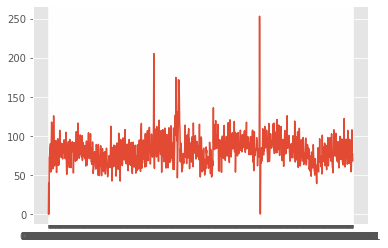

In [2]:
fish_df = pd.read_excel(r'../data/file.xlsx')
plt.plot(fish_df.ds, fish_df.sales)

In [115]:
print(fish_df[fish_df.sales > 30].ds)

362    30.12.2019
416    24.02.2020
438    17.03.2020
448    27.03.2020
449    28.03.2020
505    23.05.2020
554    11.07.2020
795    11.03.2021
959    22.08.2021
Name: ds, dtype: object


In [106]:
print(fish_df[fish_df.sales < 6].ds)

113    25.04.2019
118    30.04.2019
338    06.12.2019
567    24.07.2020
848    03.05.2021
859    14.05.2021
895    19.06.2021
899    23.06.2021
992    24.09.2021
Name: ds, dtype: object


In [4]:
fish_df.sales.describe()

count    1049.000000
mean       80.900686
std        18.964829
min         0.000000
25%        69.200000
50%        79.550000
75%        90.900000
max       252.980000
Name: sales, dtype: float64

Убираем выбросы по правилу 3 сигм

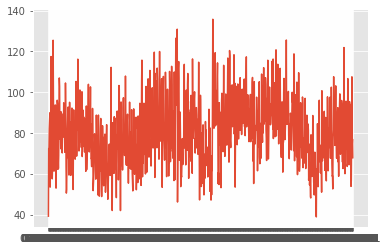

In [3]:
sales_with_trash = fish_df.sales
mean = np.mean(sales_with_trash) # выборочное среднее
sigma = np.std(sales_with_trash)   # выборочное стандартное отклонение
dataFrame3Sigma = fish_df[(sales_with_trash > mean - 3*sigma) & (sales_with_trash < mean + 3*sigma)]
dates , sales = dataFrame3Sigma.ds , dataFrame3Sigma.sales
statParams = sales.describe()
plt.plot(dates, sales)

In [5]:
sales.describe()

count    1036.000000
mean       80.410936
std        15.948386
min        38.950000
25%        69.200000
50%        79.405000
75%        90.647500
max       135.800000
Name: sales, dtype: float64

Statistic

In [6]:
sales_hist, a = np.histogram(sales, bins=100, density=True) # гистограмма
x = np.linspace(min(a), max(a), 100)
real_mean, real_sigma = stats.norm.fit(sales)

Text(0.5, 0, 'спрос')

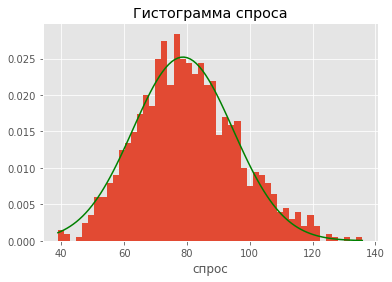

In [11]:
from astropy import modeling
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D(amplitude=35, mean=mean, stddev=sigma)   # depending on the data you need to give some initial values
fitted_model = fitter(model, x, sales_hist)
#plt.bar(x, sales_hist)
plt.hist(sales, bins = 50, density=True)
plt.plot(x, fitted_model(x), color="green")
norm_rv = stats.norm(real_mean, real_sigma)
plt.title("Гистограмма спроса")
plt.xlabel("спрос")

Проверка на нормальность

In [12]:
stat, p = scipy.stats.normaltest(fish_df.sales) # Критерий согласия Пирсона
print(stat)
print("p = {:g}".format(p))
alpha=0.05
if p > alpha:
    print("Принять гипотезу о нормальности")
else:
    print("Отклонить гипотезу о нормальности")

378.99875359652185
p = 5.02882e-83
Отклонить гипотезу о нормальности


In [13]:
stat, p = scipy.stats.shapiro(sales) # тест Шапиро-Уилк 
print(stat)
print("p = {:g}".format(p))
alpha=0.05
if p > alpha:
    print("Принять гипотезу о нормальности")
else:
    print("Отклонить гипотезу о нормальности")

0.9928537607192993
p = 6.83996e-05
Отклонить гипотезу о нормальности


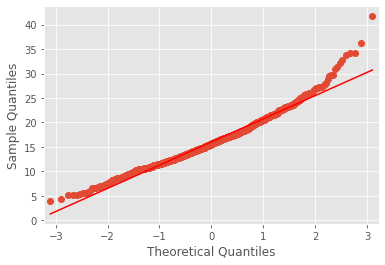

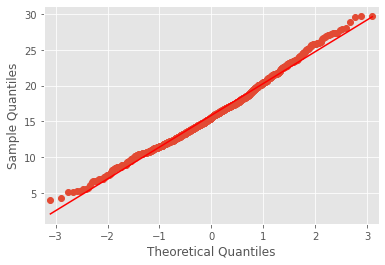

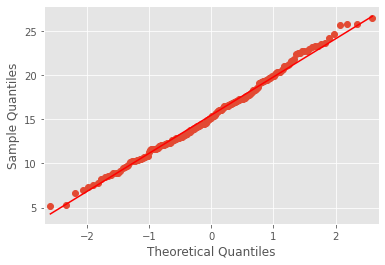

In [99]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(sales_with_trash, line='s')
pyplot.show()

qqplot(sales, line='s')
pyplot.show()

qqplot(sales[::5], line='s')
pyplot.show()

На практике тест Шапиро-Уилка считается надежным тестом нормальности, хотя есть некоторые предположения, что этот тест может быть пригоден для небольших выборок данных, например, тысячи наблюдений или меньше

In [14]:
from scipy.stats import shapiro
stat, p = shapiro(sales[::5])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Принять нулевую гипотезу -распределние нормальное')
else:
	print('Отклонить')

Statistics=0.992, p=0.307
Принять нулевую гипотезу -распределние нормальное


Тест д'Агостино на K ^ 2
K'2-тест Д'Агостиновычисляет итоговую статистику на основе данных, а именно, эксцесс и асимметрия, чтобы определить, отклоняется ли распределение данных от нормального распределения, названного по имени Ralph D’Agostino.

In [15]:
from scipy.stats import normaltest
stat, p = normaltest(sales[::5])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Принять нулевую гипотезу -распределние нормальное')
else:
	print('Отклонить')

Statistics=1.336, p=0.513
Принять нулевую гипотезу -распределние нормальное
